<a href="https://colab.research.google.com/github/Aadya1504/Deep-Learning/blob/main/CNN_YOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LOADING YOLO
YOLO LOADED
Input Image:


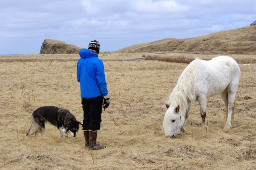

Detected object: horse, confidence: 1.00, box: 159, 53, 84, 83
Detected object: dog, confidence: 0.98, box: 24, 104, 58, 35
Detected object: person, confidence: 1.00, box: 76, 36, 33, 113


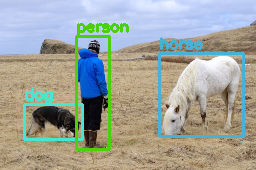

In [2]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load YOLO model
print("LOADING YOLO")
net = cv2.dnn.readNet("/content/yolov3.weights", "/content/yolov3 (1).cfg")

# Load the COCO class names
with open("/content/coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]
print("YOLO LOADED")

# Load the input image
img = cv2.imread("/content/person.jpg")  # Ensure the image is in the correct path
 # Ensure the image is in the correct path
img = cv2.resize(img, None, fx=0.4, fy=0.4)
height, width, channels = img.shape

print("Input Image:")
cv2_imshow(img)

# Preprocessing the image for YOLO
blob = cv2.dnn.blobFromImage(img, 1 / 255.0, (416, 416), swapRB=True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)

class_ids = []
confidences = []
boxes = []

# Processing YOLO output
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]

        if confidence > 0.3:
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

# Non-Maximum Suppression to remove redundant boxes
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

# Random color for each class
colors = np.random.uniform(0, 255, size=(len(classes), 3))

# Draw bounding boxes and labels
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[class_ids[i]]

        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img, label, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

        print(f"Detected object: {label}, confidence: {confidences[i]:.2f}, box: {x}, {y}, {w}, {h}")

# Show the final image with detected objects
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()